<a href="https://colab.research.google.com/github/SteelworkerDB/AML_W2/blob/main/Proyecto2_ModelosDesarrollados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO 2


##PROPIEDADES EN ECUADOR


1) Fuente de datos

    Sinthia Guaigua. (2022). DataSet Inmobiliario [Data set]. Zenodo. https://doi.org/10.5281/zenodo.6413272

    Scraped de https://www.inmovision.com.ec/

    Abril 5, 2022

2) Breve descripción de datos

   *Un listado de propiedades en el Ecuador con información detallada que posiblemente no se encuentra detallada en otras bases de datos.*

3) ¿Cuál es el objetivo?

  *Comprender el mercado inmobiliario del Ecuador, lograr predecir costo de una propiedad en base a sus características.*

4) ¿Este es un problema de clasificación o regresión?

*  Regresión.*

5) ¿Cuántas características hay?

*15 (16 contando la fecha de publicación de la información)*

6) ¿Cuántas filas de datos hay?

 *206*

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

  *Demasiados valores perdidos/vacíos.  Características que se observan completas en más de la mitad de las filas son: TIPO DE PROPIEDAD, SECTOR, PRECIO, REFERENCIA, DORMITORIOS, BAÑOS, ANTIGUEDAD, SUPERFICIES, AMBIENTES.  Algunas solo tienen completas un poco más de la mitad del total de filas.*

  *En general, 206 datos no es una gran cantidad de datos, especialmente con tantos valores perdidos.*


---
---


##REVISIÓN PRELIMINAR

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
filename='/content/datos.csv'
df_housing=pd.read_csv(filename,encoding='latin_1')
df_housing.head(10)

,Tipo de Propiedad,Sector,Total construido,Precio,Referencia,Dormitorios,Baños,Antiguedad,Superficie,Ambientes,24 Hours Security,Alcantarillado,Parqueadero fijo,Seguridad 24Hs,Expensas,Fecha de entrega,Fecha
0,Departamento,Same,160 m²,USD160.000,"El Muelle, Esmeraldas",3.0,2.0,15,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
1,Casa,El Bosque,960 m²,USD800.000,"Sector Unión Nacional, El Bosque",5.0,5.0,38,1443 m²,6.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
2,Casa,Cumbayá,275 m²,USD360.000,"Cumbayá, junto al Colegio Menor",3.0,3.0,A Estrenar,60 m²,4.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
3,Terreno,Checa,NaN,USD275.000,Checa,NaN,NaN,NaN,5000 m²,NaN,No,No,NaN,NaN,NaN,NaN,03-04-2022
4,Casa,Cumbayá,1740 m²,USD850.000,Tanda,4.0,3.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
5,Casa,Cumbayá,240 m²,USD319.000,Urbanización Pachosalas,3.0,3.0,A Estrenar,123 m²,4.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
6,Casa,Cumbayá,221 m²,USD298.000,Urbanización Pachosalas,3.0,3.0,A Estrenar,112 m²,4.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
7,Terreno,Puembo,NaN,USD138.000,Urbanización Plaza del Parque Puembo,NaN,NaN,NaN,596 m²,NaN,Si,Si,NaN,NaN,NaN,NaN,03-04-2022
8,Departamento,Cumbayá,174 m²,USD219.000,"Cumbayá, Proyecto Sironi",3.0,2.0,5,120 m²,4.0,NaN,NaN,NaN,NaN,NaN,NaN,03-04-2022
9,Terreno,Cumbayá,NaN,USD498.780,La Viña del Río Parte alta,NaN,NaN,NaN,1467 m²,NaN,Si,Si,NaN,NaN,NaN,NaN,03-04-2022


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  206 non-null    object 
 1   Sector             206 non-null    object 
 2   Total construido   128 non-null    object 
 3   Precio             206 non-null    object 
 4   Referencia         206 non-null    object 
 5   Dormitorios        121 non-null    float64
 6   Baños              126 non-null    float64
 7   Antiguedad         132 non-null    object 
 8   Superficie         137 non-null    object 
 9   Ambientes          108 non-null    float64
 10  24 Hours Security  73 non-null     object 
 11  Alcantarillado     73 non-null     object 
 12  Parqueadero fijo   10 non-null     object 
 13  Seguridad 24Hs     10 non-null     object 
 14  Expensas           7 non-null      float64
 15  Fecha de entrega   4 non-null      object 
 16  Fecha              206 non

###- Eliminar columnas innecesarias

In [ ]:
df_housing.columns

Index(['Tipo de Propiedad', 'Sector', 'Total construido', 'Precio',
       'Referencia', 'Dormitorios', 'Baños', 'Antiguedad', 'Superficie',
       'Ambientes', '24 Hours Security', 'Alcantarillado', 'Parqueadero fijo',
       'Seguridad 24Hs', 'Expensas', 'Fecha de entrega', 'Fecha'],
      dtype='object')

Existen dos columnas de seguridad, voy a combinarlas y dejar una única columna

In [ ]:
df_housing['Seguridad 24Hs'].value_counts()

Si    8
No    2
Name: Seguridad 24Hs, dtype: int64

In [ ]:
df_housing['24 Hours Security'].value_counts()

Si    45
No    28
Name: 24 Hours Security, dtype: int64

Transformo las columnas a booleano con un diccionario

In [ ]:
dic_seg={'Si':True, 'No':False}
df_housing['Seguridad 24Hs'].replace(dic_seg, inplace=True)
df_housing['24 Hours Security'].replace(dic_seg,inplace=True)

En ambas voy a reemplazar el valor NAN con False

In [ ]:
df_housing['Seguridad 24Hs'].fillna(False, inplace=True)
df_housing['24 Hours Security'].fillna(False, inplace=True)

Combino las dos columnas con una operación booleana + (OR) para marcar verdadero si cualquiera de las dos columnas es verdadera, y falso si las dos columnas muestran valor falso.

In [ ]:
df_housing['Seguridad24h']=df_housing['Seguridad 24Hs'] + df_housing['24 Hours Security']

In [ ]:
#Elimino columnas de seguridad originales
df_housing.drop(['Seguridad 24Hs','24 Hours Security'], axis=1, inplace=True)

In [ ]:
df_housing['Seguridad24h'].value_counts()

False    153
True      53
Name: Seguridad24h, dtype: int64

In [ ]:
df_housing['Alcantarillado'].value_counts()

Si    41
No    32
Name: Alcantarillado, dtype: int64

Elimino las columnas restantes con 10 datos o menos. Elimino la columna de Alcantarillado porque resulta difícil la imputación de un valor según frecuencia, o aleatorio.  

In [ ]:
df_housing.drop(['Alcantarillado', 'Parqueadero fijo', 'Expensas', 'Fecha de entrega', 'Fecha'], axis=1, inplace=True)

Elimina la columna de referencia porque es una variable de texto informativo sobre el sector.  Esta información ya la tiene la columna de sector.

In [ ]:
df_housing.drop(['Referencia'], axis=1, inplace=True)

##- Eliminar Duplicados

In [ ]:
df_housing.duplicated().sum()

0

No existen duplicados.

##- Valores Faltantes

- **Columna de Baños:**

In [ ]:
  df_housing.groupby('Tipo de Propiedad')['Baños'].value_counts(dropna=False)

Tipo de Propiedad  Baños
Casa               3.0      36
                   2.0      15
                   4.0      15
                   5.0       4
                   7.0       1
                   10.0      1
Departamento       2.0      24
                   3.0      15
                   1.0       4
                   4.0       1
Galpón             NaN       1
Hotel              NaN       1
Oficina            NaN       5
                   2.0       3
                   1.0       2
Quinta             3.0       2
                   5.0       2
                   2.0       1
Terreno            NaN      73
Name: Baños, dtype: int64

De los datos se observa que se puede imputar 0 en los valores faltantes de Baños, por el tipo de propiedad (un terreno vacío no tiene baños todavía)

In [ ]:
df_housing['Baños'].fillna(0, inplace=True)

- **Columna de ambientes:**

In [ ]:
df_housing.groupby('Tipo de Propiedad')['Ambientes'].value_counts(dropna=False)

Tipo de Propiedad  Ambientes
Casa               4.0          26
                   5.0          21
                   6.0          10
                   NaN           6
                   10.0          4
                   7.0           2
                   2.0           1
                   8.0           1
                   9.0           1
Departamento       4.0          18
                   3.0           8
                   NaN           7
                   5.0           6
                   2.0           3
                   6.0           2
Galpón             NaN           1
Hotel              NaN           1
Oficina            NaN          10
Quinta             8.0           2
                   4.0           1
                   5.0           1
                   10.0          1
Terreno            NaN          73
Name: Ambientes, dtype: int64

Puedo realizar una imputación con valores de 0 en terreno, en Galpon, Hotel y Oficina puedo colocar 1, y en Departamento y Casa puedo utilizar el promedio.

In [ ]:
#Para imputar genero filtros
filtro_casa=df_housing['Tipo de Propiedad']=='Casa'
filtro_depar=df_housing['Tipo de Propiedad']=='Departamento'
filtro_terreno=df_housing['Tipo de Propiedad']=='Terreno'

prom_casa=df_housing['Ambientes'][filtro_casa].dropna().mean().round(2)
prom_depar=round(df_housing['Ambientes'][filtro_depar].dropna().mean(),2)

In [ ]:
#Imputación en casas, departamentos y terrenos
df_housing['Ambientes'][filtro_casa].fillna(prom_casa, inplace=True)
df_housing['Ambientes'][filtro_depar].fillna(prom_depar, inplace=True)
df_housing['Ambientes'][filtro_terreno].fillna(0, inplace=True)

In [ ]:
#Imputación en propiedades restantes
df_housing['Ambientes'].fillna(1, inplace=True)

- **Total construido**

In [ ]:
df_housing.groupby('Tipo de Propiedad')['Total construido'].value_counts(dropna=False)

Tipo de Propiedad  Total construido
Casa               160 m²               4
                   240 m²               2
                   275 m²               2
                   300 m²               2
                   400 m²               2
                                       ..
Quinta             400 m²               1
                   500 m²               1
                   750 m²               1
                   900 m²               1
Terreno            NaN                 73
Name: Total construido, Length: 121, dtype: int64

73 NaN en Terrenos, es posible imputarles 0.

In [ ]:
df_housing['Total construido'].isna().sum()

78

5 valores faltantes se encuentran en otras propiedades que no son terrenos.

In [ ]:
df_housing.groupby(['Antiguedad','Tipo de Propiedad'])['Total construido'].apply(lambda x: x.isna().sum())

Antiguedad       Tipo de Propiedad
1                Casa                 0
                 Departamento         0
                 Oficina              1
10               Casa                 0
                 Departamento         0
                 Quinta               0
11               Casa                 0
12               Casa                 0
                 Departamento         0
13               Casa                 0
14               Quinta               0
15               Casa                 0
                 Departamento         0
17               Casa                 0
18               Casa                 0
2                Casa                 0
                 Departamento         0
20               Casa                 0
                 Quinta               0
22               Departamento         0
24               Casa                 0
25               Casa                 0
27               Departamento         0
3                Casa                 0
     

De los 5 faltantes, 4 son propiedades a estrenar o nuevas, que muy posiblemente no tengan construcción.  Se imputa todo con 0 sin problemas.

In [ ]:
df_housing['Total construido']=df_housing['Total construido'].str.extract(pat='(\d+) ')

In [ ]:
df_housing['Total construido'].replace(np.nan,0,inplace=True)

In [ ]:
df_housing['Total construido'].isna().sum()

0

In [ ]:
df_housing['Total construido']=df_housing['Total construido'].astype(float)

- **Dormitorios**

In [ ]:
df_housing.groupby('Tipo de Propiedad')['Dormitorios'].value_counts(dropna=False)

Tipo de Propiedad  Dormitorios
Casa               3.0            43
                   4.0            22
                   2.0             2
                   5.0             2
                   6.0             2
                   8.0             1
Departamento       3.0            23
                   2.0            16
                   1.0             3
                   4.0             2
Galpón             NaN             1
Hotel              NaN             1
Oficina            NaN            10
Quinta             3.0             2
                   4.0             1
                   5.0             1
                   6.0             1
Terreno            NaN            73
Name: Dormitorios, dtype: int64

Puedo imputar 0 ya que las propiedades con valores NaN no tienen dormitorios.

In [ ]:
df_housing['Dormitorios'].fillna(0, inplace=True)

- **Antiguedad**

In [ ]:
df_housing.groupby('Tipo de Propiedad')['Antiguedad'].value_counts(dropna=False)

Tipo de Propiedad  Antiguedad     
Casa               A Estrenar         19
                   8                   7
                   2                   6
                   5                   6
                   En Construcción     6
                   9                   4
                   4                   3
                   6                   3
                   1                   2
                   11                  2
                   12                  2
                   25                  2
                   10                  1
                   13                  1
                   15                  1
                   17                  1
                   18                  1
                   20                  1
                   24                  1
                   3                   1
                   38                  1
                   7                   1
Departamento       5                   8
                   A E

Es posible imputar 0 en todas los valores no numéricos porque indican mayormente que en verdad no existe la edificación.

In [ ]:
#Uso funcion to_numeric para reemplazar palabras con NaN
df_housing['Antiguedad']= pd.to_numeric(df_housing['Antiguedad'], errors='coerce')
#https://stackoverflow.com/questions/33440234/pandas-how-to-replace-string-with-zero-values-in-a-dataframe-series

#Luego reemplazo NaN con 0
df_housing['Antiguedad'].fillna(0, inplace=True)
df_housing.groupby('Tipo de Propiedad')['Antiguedad'].value_counts(dropna=False)

Tipo de Propiedad  Antiguedad
Casa               0.0           25
                   8.0            7
                   2.0            6
                   5.0            6
                   9.0            4
                   4.0            3
                   6.0            3
                   1.0            2
                   11.0           2
                   12.0           2
                   25.0           2
                   3.0            1
                   7.0            1
                   10.0           1
                   13.0           1
                   15.0           1
                   17.0           1
                   18.0           1
                   20.0           1
                   24.0           1
                   38.0           1
Departamento       0.0            8
                   5.0            8
                   3.0            5
                   2.0            4
                   10.0           4
                   8.0            

- **Superficie**

Es necesario eliminar las unidades de m2 de la columna para que esta sea numérica.

In [ ]:
#Extraigo numeros con regex
#REF: https://saturncloud.io/blog/extracting-numbers-from-a-string-in-a-pandas-dataframe-a-comprehensive-guide/#:~:text=Pandas%20provides%20a%20function%20str,for%20pattern%20matching%20in%20strings.&text=In%20the%20code%20above%2C%20(%5C,matches%20one%20or%20more%20digits.
df_housing['Superficie']=df_housing['Superficie'].str.replace('m²','')
df_housing['Superficie']= pd.to_numeric(df_housing['Superficie'], errors='coerce')

Para imputar verifico los valores faltantes por Tipo de Propiedad

In [ ]:
#Genero filtro con verdadero en los valores faltantes, y un df auxiliar con estas filas
filtro_s=df_housing['Superficie'].isna()
df_aux=df_housing[filtro_s]

In [ ]:
#Visualizo los faltantes por tipo de propiedad
df_aux.groupby('Tipo de Propiedad')['Superficie'].value_counts(dropna=False)

Tipo de Propiedad  Superficie
Casa               NaN            8
Departamento       NaN           33
Oficina            NaN           10
Terreno            NaN           18
Name: Superficie, dtype: int64

Es buena idea imputar usando los promedios de cada tipo de propiedad, se entiende que las casa por lo general tienen mayor superficie que los departamentos, lo mismo con las oficinas y los terrenos.

In [ ]:
df_aux2=df_housing[['Superficie','Tipo de Propiedad']].dropna()
df_aux2['Superficie']=df_aux2['Superficie'].astype(float)
#Promedios de Superficie por Tipo de Propiedad
promedios=df_aux2.groupby('Tipo de Propiedad')['Superficie'].mean().round(2)
promedios

Tipo de Propiedad
Casa             688.84
Departamento      55.82
Galpón          1379.00
Hotel           5650.00
Quinta          4431.00
Terreno         5013.27
Name: Superficie, dtype: float64

In [ ]:
#Para imputar genero filtro
filtro_ofi=df_housing['Tipo de Propiedad']=='Oficina'

In [ ]:
#Imputación en casas, departamentos, oficinas y terrenos con sus promedios respectivos

df_housing['Superficie'][filtro_casa]=df_housing['Superficie'][df_housing['Tipo de Propiedad']=='Casa'].replace(np.nan, promedios.loc['Casa'])
df_housing['Superficie'][filtro_depar]=df_housing['Superficie'][filtro_depar].replace(np.nan,promedios.loc['Departamento'])
df_housing['Superficie'][filtro_ofi]=df_housing['Superficie'][filtro_ofi].replace(np.nan, promedios.loc['Departamento'])
df_housing['Superficie'][filtro_terreno]=df_housing['Superficie'][filtro_terreno].replace(np.nan, promedios.loc['Terreno'])

<ipython-input-38-47e72b63bd9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing['Superficie'][filtro_casa]=df_housing['Superficie'][df_housing['Tipo de Propiedad']=='Casa'].replace(np.nan, promedios.loc['Casa'])
<ipython-input-38-47e72b63bd9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_housing['Superficie'][filtro_depar]=df_housing['Superficie'][filtro_depar].replace(np.nan,promedios.loc['Departamento'])
<ipython-input-38-47e72b63bd9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  206 non-null    object 
 1   Sector             206 non-null    object 
 2   Total construido   206 non-null    float64
 3   Precio             206 non-null    object 
 4   Dormitorios        206 non-null    float64
 5   Baños              206 non-null    float64
 6   Antiguedad         206 non-null    float64
 7   Superficie         206 non-null    float64
 8   Ambientes          206 non-null    float64
 9   Seguridad24h       206 non-null    bool   
dtypes: bool(1), float64(6), object(3)
memory usage: 14.8+ KB


##- Inconsistencia Dtype Precio

In [ ]:
df_housing['Precio'].head()

0    USD160.000
1    USD800.000
2    USD360.000
3    USD275.000
4    USD850.000
Name: Precio, dtype: object

In [ ]:
df_housing['Precio']=df_housing['Precio'].str.replace('USD','')

In [ ]:
df_housing['Precio']=df_housing['Precio'].str.replace('.','')

<ipython-input-42-69aa6968b716>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_housing['Precio']=df_housing['Precio'].str.replace('.','')


In [ ]:
df_housing['Precio']=df_housing['Precio'].astype(float)

In [ ]:
df_housing.head()

,Tipo de Propiedad,Sector,Total construido,Precio,Dormitorios,Baños,Antiguedad,Superficie,Ambientes,Seguridad24h
0,Departamento,Same,160.0,160000.0,3.0,2.0,15.0,55.82,4.0,False
1,Casa,El Bosque,960.0,800000.0,5.0,5.0,38.0,1443.00,6.0,False
2,Casa,Cumbayá,275.0,360000.0,3.0,3.0,0.0,60.00,4.0,False
3,Terreno,Checa,0.0,275000.0,0.0,0.0,0.0,5000.00,1.0,False
4,Casa,Cumbayá,1740.0,850000.0,4.0,3.0,8.0,688.84,1.0,False


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Propiedad  206 non-null    object 
 1   Sector             206 non-null    object 
 2   Total construido   206 non-null    float64
 3   Precio             206 non-null    float64
 4   Dormitorios        206 non-null    float64
 5   Baños              206 non-null    float64
 6   Antiguedad         206 non-null    float64
 7   Superficie         206 non-null    float64
 8   Ambientes          206 non-null    float64
 9   Seguridad24h       206 non-null    bool   
dtypes: bool(1), float64(7), object(2)
memory usage: 14.8+ KB


## - Otras Inconsistencias

In [ ]:
df_housing['Sector'].value_counts()

Cumbayá                   83
Tumbaco                   39
Puembo                    22
Nayón - Tanda              9
La Carolina                6
Checa                      4
Pifo                       4
El Bosque                  3
Miravalle                  3
González Suárez            3
Tababela                   2
Bellavista                 2
Norte de Manta             2
Quito Tenis                2
Centro Norte               2
Centro de Manta            2
Norte de Pedernales        2
Iñaquito Alto              2
Carcelén                   1
Monteserrín                1
Centro de Punta Blanca     1
Carapungo                  1
Calderón                   1
Tonsupa                    1
Los Chillos                1
Norte de Punta Blanca      1
Manta                      1
Mitad del Mundo            1
Atacames                   1
Centro de Same             1
Centro de Ambato           1
Same                       1
Name: Sector, dtype: int64

No hay inconsistencias en el Sector.  Aclarar que Centro Norte se refiere a la ciudad de Quito.

In [ ]:
#Reemplazo para aclaración
dicc_clar={'Centro Norte':'Centro Norte Quito'}
df_housing['Sector'].replace(dicc_clar, inplace=True)



---


## VISUALIZACION OBJECTIVO

<function matplotlib.pyplot.show(close=None, block=None)>

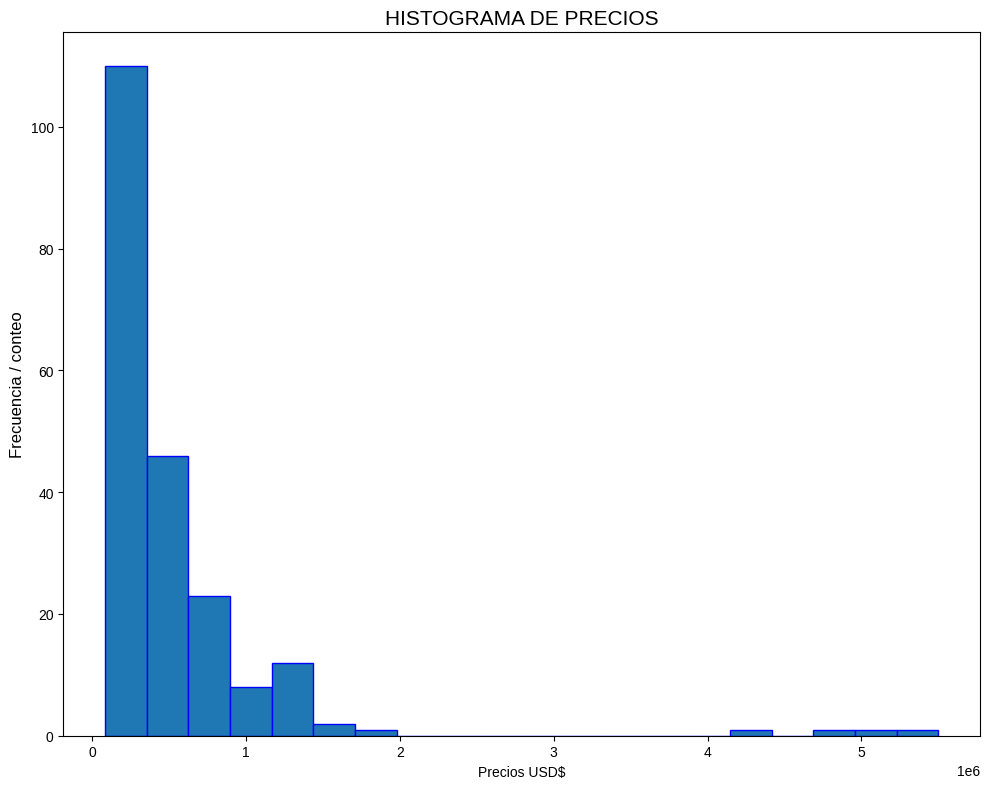

In [ ]:

#HISTOGRAMA DE PRECIOS
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True, sharey=True,
                        tight_layout=True)

plt.title('HISTOGRAMA DE PRECIOS',fontsize=15)
plt.xlabel('Precios USD$')
plt.ylabel('Frecuencia / conteo',fontsize=12)

ax.hist(df_housing['Precio'], bins=20, ec='blue')

plt.style.use('seaborn-v0_8') #estilo dark de matplotlib
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

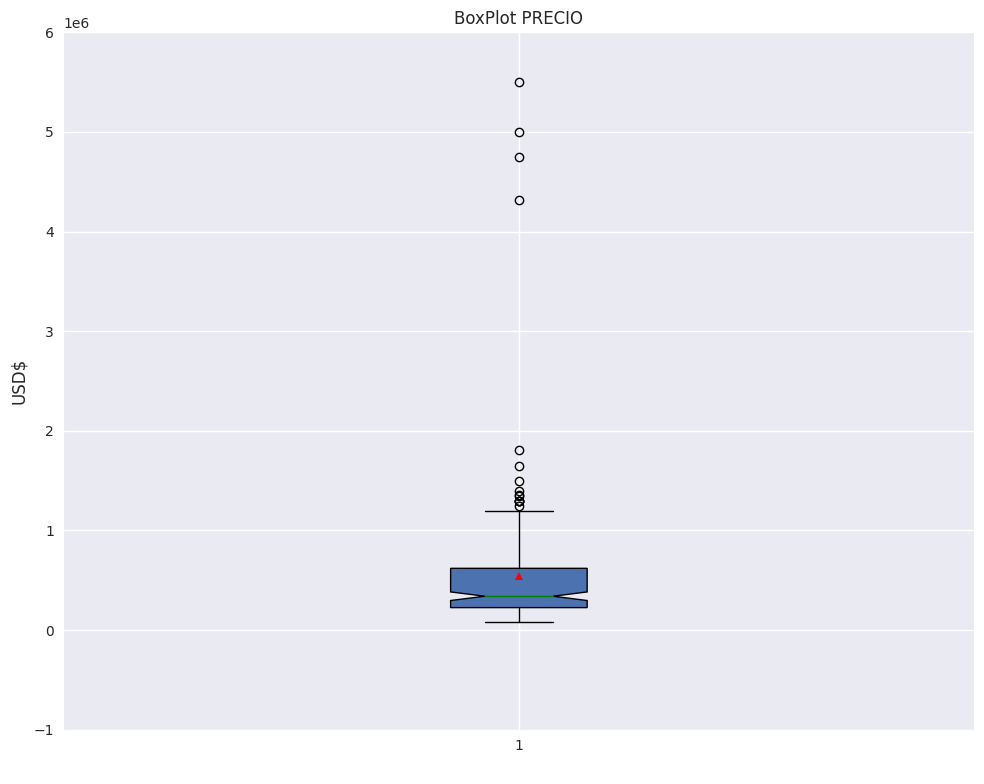

In [ ]:
#BOXPLOTS
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True, sharey=True,
                        tight_layout=True)

plt.title('HISTOGRAMA DE PRECIOS',fontsize=15)
plt.xlabel(' ')
plt.ylabel('USD$',fontsize=12)

ax.boxplot(df_housing['Precio'], notch = True, showmeans=True,\
             patch_artist=True);
plt.title('BoxPlot PRECIO')
plt.style.use('classic')
plt.show

Parece que existen 4 valores atípicos en la distribución, si bien hay algunos valores fuera del 3er cuartil, utilizamos el criterio de valor z mayor a 3 para eliminar los valores atípicos.

In [ ]:
#Calcula el valor z para los valores de Precio y los elimina del dataframe
df_h=df_housing[(np.abs(stats.zscore(df_housing['Precio'])) < 3)]

In [ ]:
df_h.shape

(202, 10)

Se han eliminado los 4 outliers en base al valor z.

<function matplotlib.pyplot.show(close=None, block=None)>

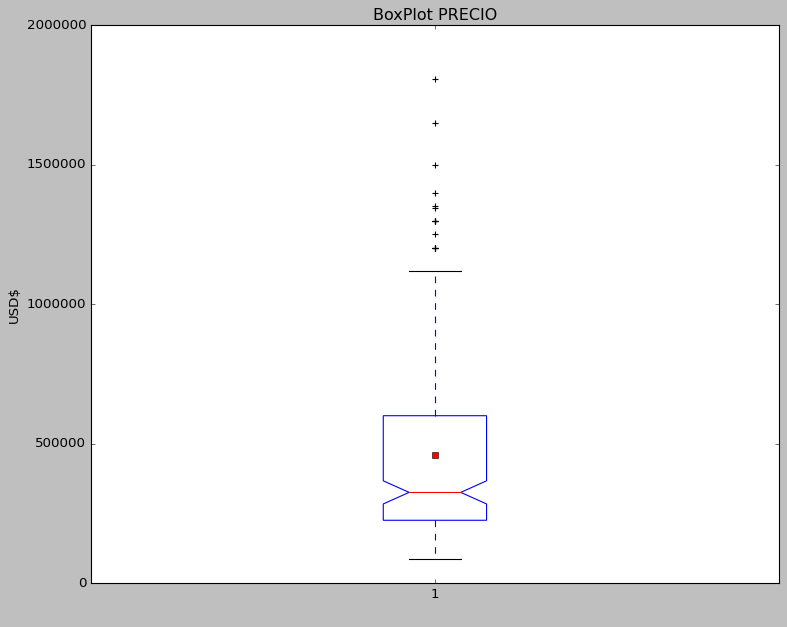

In [ ]:
#BOXPLOTS
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True, sharey=True,
                        tight_layout=True)

plt.title('HISTOGRAMA DE PRECIOS',fontsize=15)
plt.xlabel(' ')
plt.ylabel('USD$',fontsize=12)

ax.boxplot(df_h['Precio'], notch = True, showmeans=True,\
             patch_artist=True);

plt.title('BoxPlot PRECIO')
plt.style.use('classic')
plt.show




---


## -CORRELACIÓN

<ipython-input-53-8041093b3dee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_h.corr()


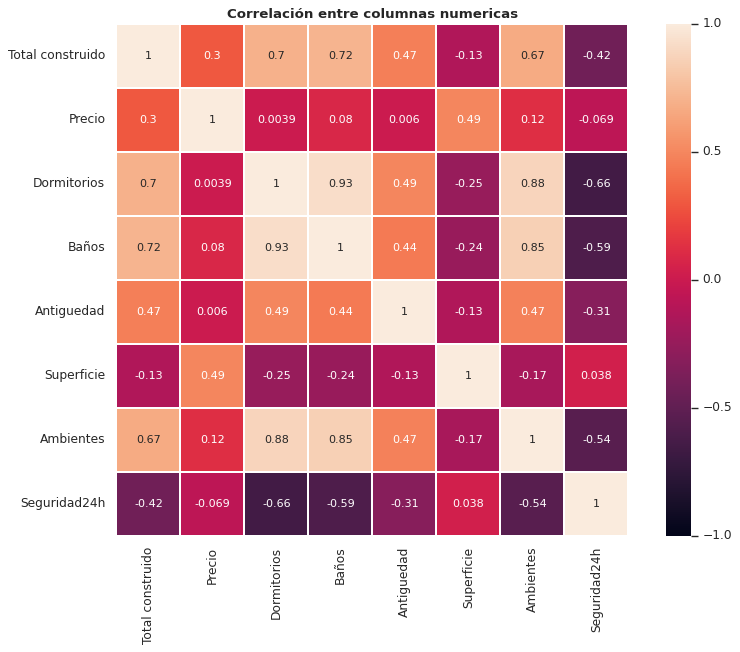

In [ ]:
corr=df_h.corr()

sns.set (rc = {'figure.figsize':(12,8)})
sns.heatmap(corr, cmap='rocket', vmax=1, vmin=-1, square=True,
        linewidths=0.1, annot=True, annot_kws={"size":10});
plt.title('Correlación entre columnas numericas',fontweight='bold');

#REF para arreglar tamaño:
# https://stackoverflow.com/questions/24783761/change-the-font-size-in-a-seaborn-corrplot

Del mapa de correlación se observa mayores valores en número de baños y dormitorios, algo con mucho sentido.

El precio tiene los mayores valores en comparación al total construido y a la superficie, pero aún son valores bajos de correlación 0.3, y 0.49.   


---

# VISUALIZACIONES

In [ ]:
df_h.head()

,Tipo de Propiedad,Sector,Total construido,Precio,Dormitorios,Baños,Antiguedad,Superficie,Ambientes,Seguridad24h
0,Departamento,Same,160.0,160000.0,3.0,2.0,15.0,55.82,4.0,False
1,Casa,El Bosque,960.0,800000.0,5.0,5.0,38.0,1443.00,6.0,False
2,Casa,Cumbayá,275.0,360000.0,3.0,3.0,0.0,60.00,4.0,False
3,Terreno,Checa,0.0,275000.0,0.0,0.0,0.0,5000.00,1.0,False
4,Casa,Cumbayá,1740.0,850000.0,4.0,3.0,8.0,688.84,1.0,False


In [ ]:
df_h.describe().round(2)

,Total construido,Precio,Dormitorios,Baños,Antiguedad,Superficie,Ambientes
count,202.00,202.00,202.00,202.00,202.00,202.00,202.00
mean,191.86,458338.29,1.90,1.79,3.97,1948.13,3.04
std,246.29,345625.92,1.73,1.67,6.56,5241.53,2.27
min,0.00,85000.00,0.00,0.00,0.00,26.00,1.00
25%,0.00,225000.00,0.00,0.00,0.00,55.82,1.00
50%,145.00,325000.00,2.00,2.00,0.00,600.00,3.00
75%,269.50,600000.00,3.00,3.00,5.00,1484.25,4.75
max,1740.00,1806930.00,8.00,10.00,38.00,60000.00,10.00


In [ ]:
filtro=df_h['Tipo de Propiedad']=='Departamento' #Filtro solo Departamentos
df_dept=df_h[filtro]
df_sec_dept=df_dept.groupby('Sector').mean().reset_index() #Agrupo por Sector

df_sec_dept['Precio por m2']=df_sec_dept['Precio']/df_sec_dept['Superficie']
df_sec_dept.sort_values('Precio por m2', ascending=False, inplace=True) #Ordeno por Precio

<ipython-input-56-2b37e94562ef>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sec_dept=df_dept.groupby('Sector').mean().reset_index() #Agrupo por Sector


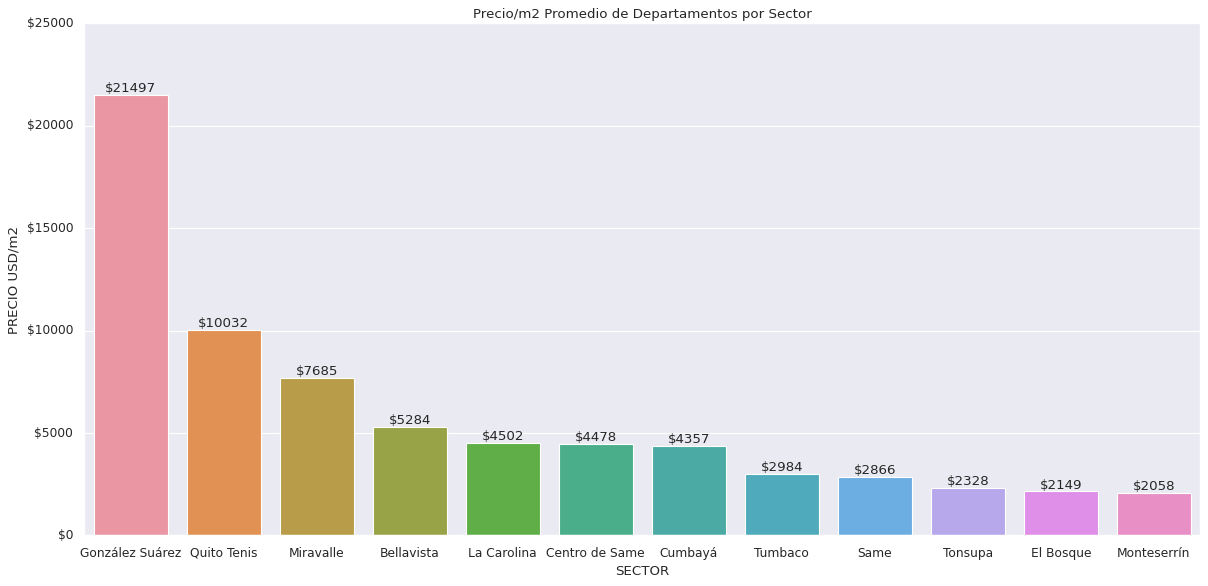

In [ ]:
sns.set (rc = {'figure.figsize':(18,8)})

ax = sns.barplot(data=df_sec_dept,x='Sector',y='Precio por m2')
ax.set(xlabel='SECTOR', ylabel='PRECIO USD/m2',title='Precio/m2 Promedio de Departamentos por Sector')
ax.bar_label(ax.containers[0],fmt='$%d');
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter('${x:1.0f}') #https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/
plt.show;

En cuanto a departamentos, los de mayor valor se encuentran en el sector de la González Suárez, seguido por el sector Quito Tenis.

In [ ]:
filtro=df_h['Tipo de Propiedad']=='Casa' #Filtro solo Casas
df_casa=df_h[filtro]
df_sec_casa=df_casa.groupby('Sector').mean().reset_index() #Agrupo por Sector

df_sec_casa['Precio por m2']=df_sec_casa['Precio']/df_sec_casa['Superficie']
df_sec_casa.sort_values('Precio por m2', ascending=False, inplace=True) #Ordeno por Precio

<ipython-input-58-78275c69edd7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sec_casa=df_casa.groupby('Sector').mean().reset_index() #Agrupo por Sector


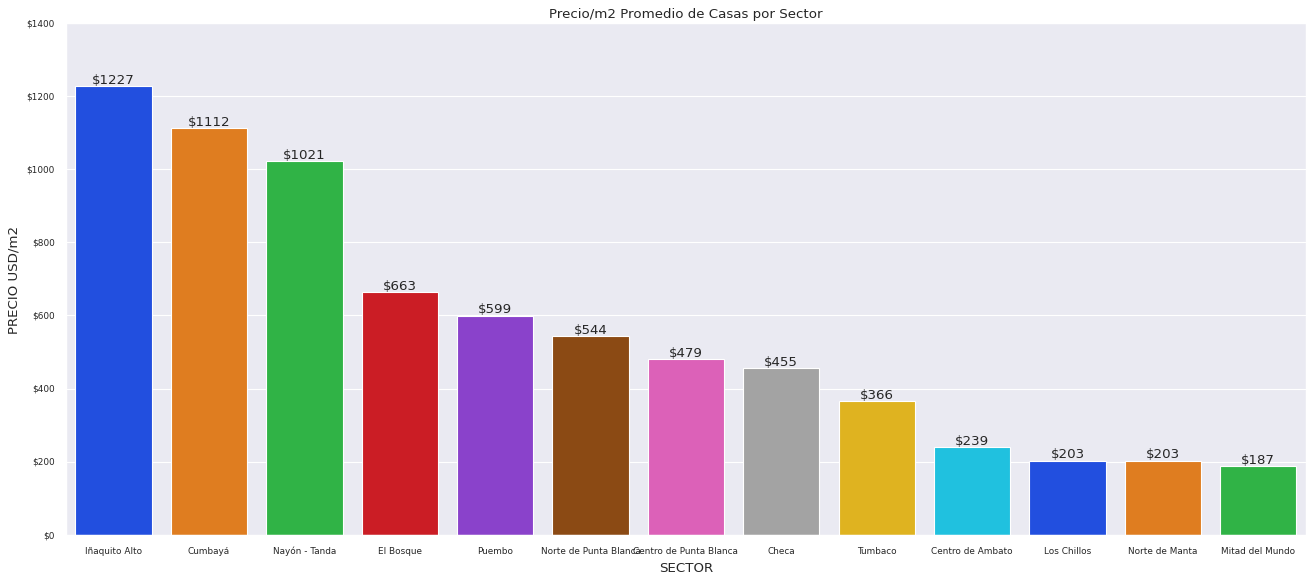

In [ ]:
sns.set_style("darkgrid")
sns.set (rc = {'figure.figsize':(20,8)})

ax = sns.barplot(data=df_sec_casa,x='Sector',y='Precio por m2', palette="bright")
ax.set(xlabel='SECTOR', ylabel='PRECIO USD/m2',title='Precio/m2 Promedio de Casas por Sector')
ax.bar_label(ax.containers[0], fmt='$%d');
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter('${x:1.0f}') #https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/
ax.tick_params(labelsize=8)
plt.show;

In [ ]:
filtro=df_h['Tipo de Propiedad']=='Terreno' #Filtro solo Departamentos
df_terr=df_h[filtro]
df_sec_terr=df_terr.groupby('Sector').mean().reset_index() #Agrupo por Sector

df_sec_terr['Precio por m2']=df_sec_terr['Precio']/df_sec_terr['Superficie']
df_sec_terr.sort_values('Precio por m2', ascending=False, inplace=True) #Ordeno por Precio

<ipython-input-60-7e3f3c3c140d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sec_terr=df_terr.groupby('Sector').mean().reset_index() #Agrupo por Sector


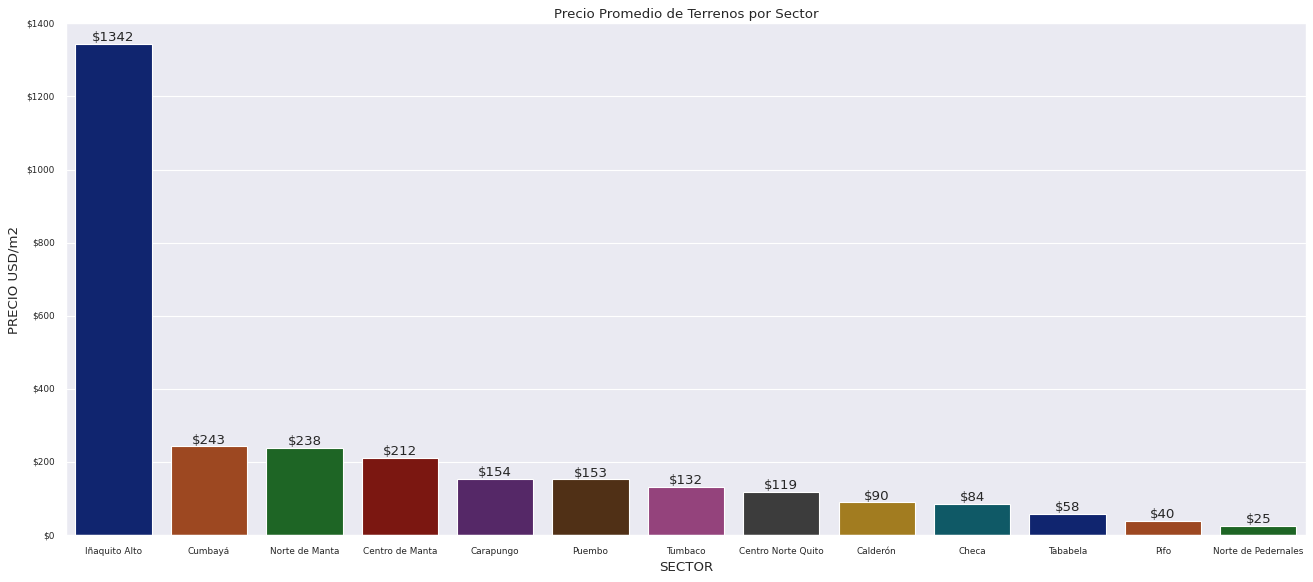

In [ ]:
sns.set_style("darkgrid")
sns.set (rc = {'figure.figsize':(20,8)})

ax = sns.barplot(data=df_sec_terr,x='Sector',y='Precio por m2', palette="dark")
ax.set(xlabel='SECTOR', ylabel='PRECIO USD/m2',title='Precio Promedio de Terrenos por Sector')
ax.bar_label(ax.containers[0], fmt='$%d');
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter('${x:1.0f}') #https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/
ax.tick_params(labelsize=8)
plt.show;

In [ ]:
df_h.describe().round(2)

,Total construido,Precio,Dormitorios,Baños,Antiguedad,Superficie,Ambientes,Seguridad24h
count,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00
mean,191.86,458338.29,1.90,1.79,3.97,1948.13,3.04,0.26
std,246.29,345625.92,1.73,1.67,6.56,5241.53,2.27,0.44
min,0.00,85000.00,0.00,0.00,0.00,26.00,1.00,0.00
25%,0.00,225000.00,0.00,0.00,0.00,55.82,1.00,0.00
50%,145.00,325000.00,2.00,2.00,0.00,600.00,3.00,0.00
75%,269.50,600000.00,3.00,3.00,5.00,1484.25,4.75,1.00
max,1740.00,1806930.00,8.00,10.00,38.00,60000.00,10.00,1.00


---

---

#MODELOS

#**MODELO: LIGHT GBM**

* Cambio de variable boolean a int para evitar que sea una variable categórica.

In [ ]:
df_h['Seguridad24h']=df_h['Seguridad24h'].apply(lambda x: 0 if x==False else 1)

<ipython-input-62-d7736dd63a88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['Seguridad24h']=df_h['Seguridad24h'].apply(lambda x: 0 if x==False else 1)


*Importación de librerías

In [ ]:
#Librerías necesarias:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

* Separación conjunto de datos de entrenamiento y prueba




In [ ]:
X=df_h.drop(columns='Precio')
y=df_h['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

* Instancias de transformadores y selectores

In [ ]:
#Instanciamos selectores de columnas
num_cols=make_column_selector(dtype_include='number')
cat_cols=make_column_selector(dtype_include='object')

In [ ]:
#Instancia de scaler y encoder
scaler=StandardScaler()
ohe=OneHotEncoder(handle_unknown='ignore')

In [ ]:
#Instancia de transformador de columna
col_transf=ColumnTransformer(transformers=[
    ('num',scaler,num_cols),
    ('cat',ohe,cat_cols)
])

* Aplicación del transformador de columna:

In [ ]:
X_train_p=col_transf.fit_transform(X_train)
X_val_p=col_transf.transform(X_val) #Uso de validación para mejorar el modelo
X_test_p=col_transf.transform(X_test) #Uso de conjunto de prueba para comprobar el modelo al finalizar la mejora

* Aplicación de modelo con parámetros default:

In [ ]:
#1er intento
#Instanciamos el modelo con los mejores parámetros:
lgbm=LGBMRegressor()

lgbm.fit(X_train_p,y_train)
print('Training accuracy:', lgbm.score(X_train_p, y_train))
print('Testing accuracy:', lgbm.score(X_val_p, y_val))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 12
[LightGBM] [Info] Start training from score 437467.602837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

* Optimización de parámetros

In [ ]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#Light GBM

#pm contiene los hiperparámetros del modelo
pm = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'num_leaves':[10, 15, 20, 25, 30],
    'min_split_gain': [0.3, 0.2, 0.1],
    'min_child_samples': [2, 3, 4]
}


gs = GridSearchCV(LGBMRegressor(), pm, refit=True, verbose=2)
gs.fit(X_train_p, y_train) #Entrenamiento con X_train y y_train

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=20, min_child_samples=4, min_split_gain=0.1, n_estimators=500, num_leaves=20; total time=   0.1s
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 113, number of used features: 16
[LightGBM] [Info] Start training from score 444303.920354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END max_depth=20, min_child_samples=4, min_split_gain=0.1, n_estimators=500, num_leaves=20; total time=   0.1s
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 113, number of used features: 16
[Light

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_child_samples': [2, 3, 4],
                         'min_split_gain': [0.3, 0.2, 0.1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [10, 15, 20, 25, 30]},
             verbose=2)

In [ ]:
#Mejores parámetros del modelo
gs.best_params_

{'max_depth': 5,
 'min_child_samples': 2,
 'min_split_gain': 0.3,
 'n_estimators': 100,
 'num_leaves': 10}

In [ ]:
#1er intento
#Instanciamos el modelo con los mejores parámetros:
lgbm=LGBMRegressor(max_depth= 5, min_child_samples= 2, min_split_gain= 0.3, n_estimators= 100, num_leaves= 10)
#Referencia Desempacar diccionario con los mejores parámetros
#REF https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#Ajustamos el modelo al conjunto de entrenamiento:
lgbm.fit(X_train_p,y_train)
#Encontramos las predicciones del modelo para el conjunto de validación
y_pred_1=lgbm.predict(X_val_p)
#R2, MSE, y RMSE:
print('\n')
print('\033[94m****************************************')
print('R2: ',r2_score(y_val,y_pred_1))
print('MAE: ',mean_absolute_error(y_val,y_pred_1))
print('RMSE: ',mean_squared_error(y_val,y_pred_1, squared=False))
print('\033[94m****************************************')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 23
[LightGBM] [Info] Start training from score 437467.602837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#Light GBM

#pm contiene los hiperparámetros del modelo
pm = {
    'n_estimators': [100],
    'max_depth': [5],
    'num_leaves':[10, 20, 30, 40],
    'min_split_gain': [0.0],
    'reg_lambda':[0.01, 0.1, 10, 100],
    'min_child_samples': [2]
}


gs = GridSearchCV(LGBMRegressor(), pm, refit=True, verbose=2)
gs.fit(X_train_p, y_train) #Entrenamiento con X_train y y_train

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'max_depth': [5], 'min_child_samples': [2],
                         'min_split_gain': [0.0], 'n_estimators': [100],
                         'num_leaves': [10, 20, 30, 40],
                         'reg_lambda': [0.01, 0.1, 10, 100]},
             verbose=2)

In [ ]:
#Mejores parámetros del modelo
bp2=gs.best_params_
print(bp2)


{'max_depth': 5, 'min_child_samples': 2, 'min_split_gain': 0.0, 'n_estimators': 100, 'num_leaves': 10, 'reg_lambda': 10}


In [ ]:
#2do intento
#Instanciamos el modelo con los mejores parámetros encontrados:
lgbm2=LGBMRegressor(**bp2)
#Referencia Desempacar diccionario con los mejores parámetros
#REF https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#Ajustamos el modelo al conjunto de entrenamiento:
lgbm2.fit(X_train_p,y_train)
#Encontramos las predicciones del modelo para el conjunto de validación
y_pred_2=lgbm2.predict(X_val_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[94m****************************************')
print('R2: ',r2_score(y_val,y_pred_2))
print('MAE: ',mean_absolute_error(y_val,y_pred_2))
print('RMSE: ',mean_squared_error(y_val,y_pred_2, squared=False))
print('\033[94m****************************************')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 23
[LightGBM] [Info] Start training from score 437467.602837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
#3er Intento con parámetros no encontrados con gridsearch

bpa={'max_depth': -1,
 'min_child_samples': 0,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'reg_lambda': 0.007,
 'reg_alpha':12,
 'num_leaves': 13}

In [ ]:
#3er intento
#Instanciamos el modelo con los mejores parámetros encontrados:
lgbm3=LGBMRegressor(**bpa)
#Referencia Desempacar diccionario con los mejores parámetros
#REF https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#Ajustamos el modelo al conjunto de entrenamiento:
lgbm3.fit(X_train_p,y_train)
#Encontramos las predicciones del modelo para el conjunto de validación
y_pred_3=lgbm3.predict(X_val_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[94m****************************************')

print('R2: ',r2_score(y_val,y_pred_3))
print('MAE: ',mean_absolute_error(y_val,y_pred_3))
print('RMSE: ',mean_squared_error(y_val,y_pred_3, squared=False))
print('\033[94m****************************************')

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 41
[LightGBM] [Info] Start training from score 437467.602837


****************************************
R2:  0.7850145766876107
MAE:  118671.11113520754
RMSE:  193466.2992981592
****************************************


**El último modelo tiene el mejor R2, con la raíz del error cuadrático medio más bajo**

#**MODELO: XGBOOST**

In [ ]:

xgb = XGBRegressor()
xgb.fit(X_train_p, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
print('Training accuracy:', xgb.score(X_train_p, y_train))
print('Testing accuracy:', xgb.score(X_val_p, y_val))

Training accuracy: 0.9918631787416349
Testing accuracy: 0.6394104222988926


In [ ]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#XGB

#pm contiene los hiperparámetros del modelo
pmx = {
    'learning_rate': [0.1, 0.2, 0.3],
    'reg_alpha':[0, 0.001, 0.01, 1, 10, 100],
    'reg_lambda':[0.1, 1, 10, 100],
    'subsample':[0.4, 0.5]

}


gsx = GridSearchCV(XGBRegressor(), pmx, refit=True, verbose=2)
gsx.fit(X_train_p, y_train) #Entrenamiento con X_train y y_train

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.4; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.4; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.4; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.4; total time=   0.1s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.4; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, reg_alpha=0, reg_lambda=0.1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1,

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'reg_alpha': [0, 0.001, 0.01, 1, 10, 100],
                         'reg_lambda': [0.1, 1, 10, 100],
                         'subsample': [0.4, 0.5]},
             verbose=2)

In [ ]:
#Mejores parámetros del modelo
bpx=gsx.best_params_
print(bpx)


{'learning_rate': 0.1, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.4}


In [ ]:
#Intento XGB
#Instanciamos el modelo con los mejores parámetros encontrados:
xgb2=XGBRegressor(**bpx)
#Referencia Desempacar diccionario con los mejores parámetros
#REF https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#Ajustamos el modelo al conjunto de entrenamiento:
xgb2.fit(X_train_p,y_train)
#Encontramos las predicciones del modelo para el conjunto de validación
y_pred_4=xgb2.predict(X_val_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[94m****************************************')

print('R2: ',r2_score(y_val,y_pred_4))
print('MAE: ',mean_absolute_error(y_val,y_pred_4))
print('RMSE: ',mean_squared_error(y_val,y_pred_4, squared=False))
print('\033[94m****************************************')



****************************************
R2:  0.6159746492735506
MAE:  161207.22202620967
RMSE:  258571.56524839657
****************************************


#**MODELO: RANDOM FOREST**

In [ ]:
#Utilizamos GridSearchCV para encontrar los mejores parámetros paa el modelo de
#Random Forest

#Ahora pm contiene los hiperparámetros del modelo
pm = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 3]
}


gsrf = GridSearchCV(RandomForestRegressor(), pm, refit=True, verbose=2)
gsrf.fit(X_train_p, y_train) #Entrenamiento con X_train y y_train

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
#Mejores parámetros del modelo
bprf=gsrf.best_params_
print(bprf)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
#Intento RF
#Instanciamos el modelo con los mejores parámetros encontrados:
rf=RandomForestRegressor(**bprf)
#Referencia Desempacar diccionario con los mejores parámetros
#REF https://stackoverflow.com/questions/45074698/how-to-pass-elegantly-sklearns-gridseachcvs-best-parameters-to-another-model
#Ajustamos el modelo al conjunto de entrenamiento:
rf.fit(X_train_p,y_train)
#Encontramos las predicciones del modelo para el conjunto de validación
y_pred_5=rf.predict(X_val_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[94m****************************************')

print('R2: ',r2_score(y_val,y_pred_5))
print('MAE: ',mean_absolute_error(y_val,y_pred_5))
print('RMSE: ',mean_squared_error(y_val,y_pred_5, squared=False))
print('\033[94m****************************************')



****************************************
R2:  0.6490093647652302
MAE:  162740.67079972962
RMSE:  247200.0656752819
****************************************




---



---

#**Comprobación del mejor modelo**

In [ ]:

y_pred_f=lgbm.predict(X_test_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[91m****************************************')

print('R2: ',r2_score(y_test,y_pred_f))
print('MAE: ',mean_absolute_error(y_test,y_pred_f))
print('RMSE: ',mean_squared_error(y_test,y_pred_f, squared=False))
print('\033[91m****************************************')



****************************************
R2:  0.641949072373222
MAE:  127489.27523488108
RMSE:  194838.24574939834
****************************************


In [ ]:

y_pred_f=lgbm2.predict(X_test_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[91m****************************************')

print('R2: ',r2_score(y_test,y_pred_f))
print('MAE: ',mean_absolute_error(y_test,y_pred_f))
print('RMSE: ',mean_squared_error(y_test,y_pred_f, squared=False))
print('\033[91m****************************************')



****************************************
R2:  0.6625245290176903
MAE:  125747.6517455751
RMSE:  189157.21672324327
****************************************


In [ ]:

y_pred_f=lgbm3.predict(X_test_p);
#R2, MSE, y RMSE:
print('\n')
print('\033[91m****************************************')

print('R2: ',r2_score(y_test,y_pred_f))
print('MAE: ',mean_absolute_error(y_test,y_pred_f))
print('RMSE: ',mean_squared_error(y_test,y_pred_f, squared=False))
print('\033[91m****************************************')



****************************************
R2:  0.5965413420473347
MAE:  140333.2567851962
RMSE:  206824.18843946862
****************************************




---



---

**#CONCLUSIONES DEL MODELO:**

* El mejor modelo logró un R2 de 0.7850 con el conjunto de validación pero apenas R2 de 0.596 con el conjunto de prueba.  Todavía está sobreajustado.

* El modelo del segundo intento de LGBM, lgbm2, logró un R2 de 0.705, pero con el conjunto de prueba logró un R2 de 0.662

* El modelo XGBOOST tiene un sobreajuste con R2 de 0.99 en el conjunto de entrenamiento y R2 de 0.616 en el conjunto de validación.  Sin embargo, la precisión con este modelo es la más alta entre los modelos sin aplicar cambios, es posible que logre excelentes resultados cambiando algunos parámetros.


